標準マイクのデータに正面のスマホのデータをかけることでスペクトルを利用できるか調査


In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from positioning.readwav import readwav
from positioning.get_spectrum_amplitude import (
    get_spectrum_amplitude,
    get_tukey_spectrum_amplitude,
)

In [3]:
sns.set(style="whitegrid")

In [4]:
standard_mic = [
    readwav(f"../data/reference_non-audible_2d/a{a}.wav") for a in range(-40, 50, 10)
]
phone_mic = [
    readwav(f"../data/reference-phone-tukey/a{a}.wav")[:, 1] for a in range(-40, 50, 10)
]

In [6]:
phone_base_spec, _ = get_tukey_spectrum_amplitude(
    phone_mic[4], first_freq=15000, last_freq=22000, ampli_band="all"
)

In [7]:
phone_base_spec.shape

(28,)

In [8]:
std_spec = np.array(
    [
        get_tukey_spectrum_amplitude(
            mic, first_freq=15000, last_freq=22000, ampli_band="all"
        )[0]
        for mic in standard_mic
    ]
)
phone_spec = np.array(
    [
        get_tukey_spectrum_amplitude(
            mic, first_freq=15000, last_freq=22000, ampli_band="all"
        )[0]
        for mic in phone_mic
    ]
)
std_spec.shape, phone_spec.shape

((9, 28), (9, 28))

In [9]:
spec_label = np.arange(15, 22, 0.25)

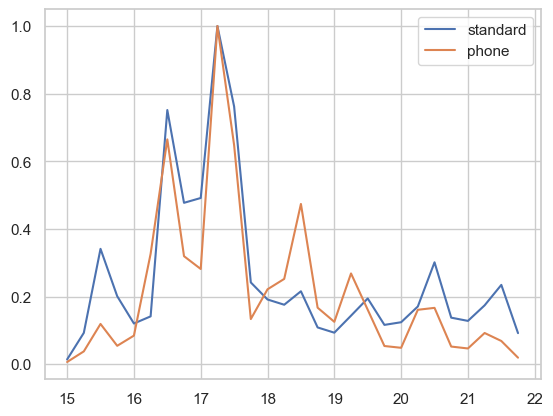

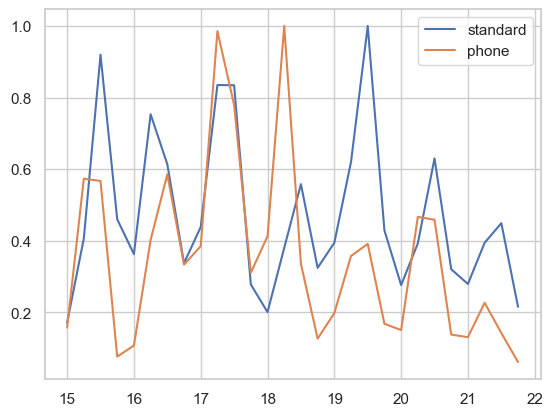

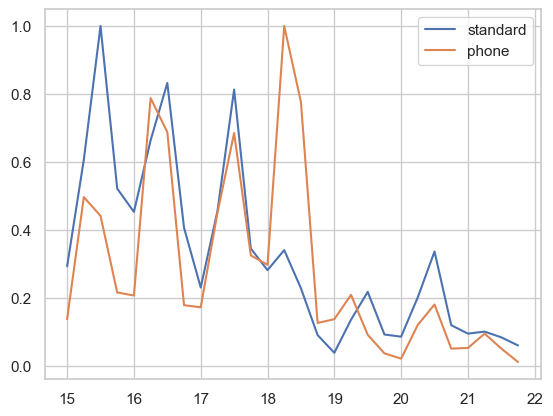

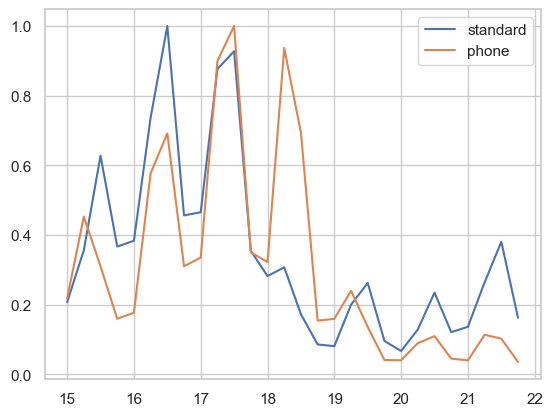

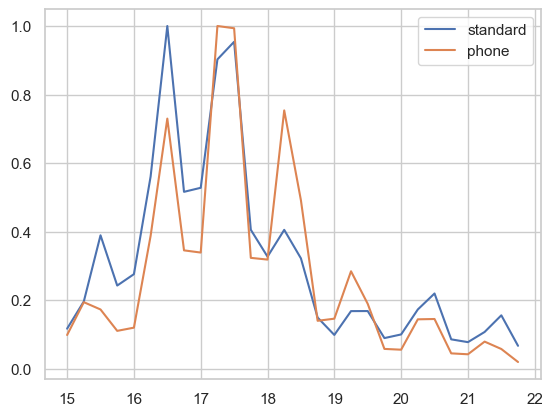

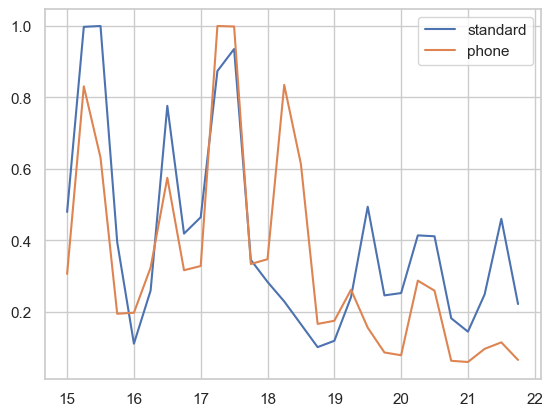

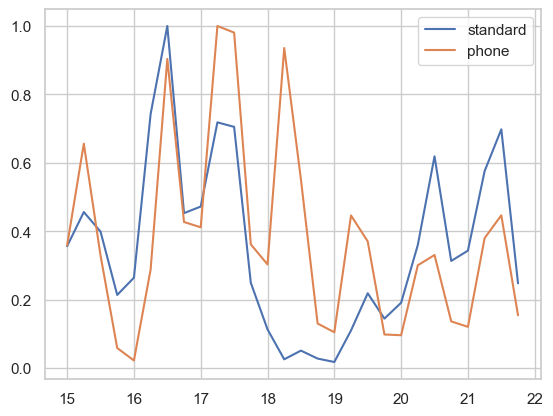

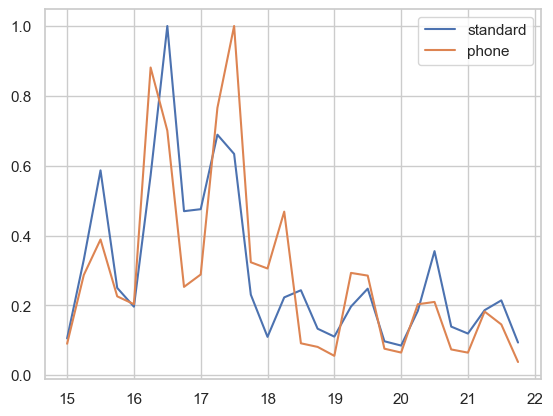

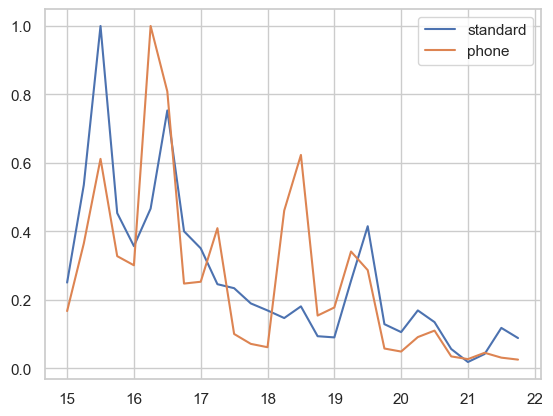

In [11]:
for i in range(9):
    sns.lineplot(x=spec_label, y=std_spec[i], label=f"standard")
    sns.lineplot(x=spec_label, y=phone_spec[i], label=f"phone")
    plt.legend()
    plt.show()

In [12]:
phone_base_filter = phone_base_spec / std_spec[4]
filtered_std_spec = std_spec * phone_base_filter

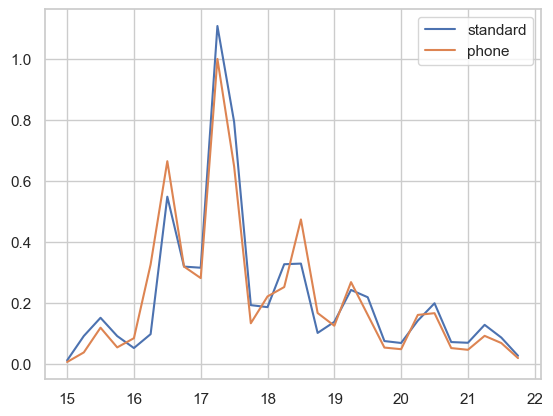

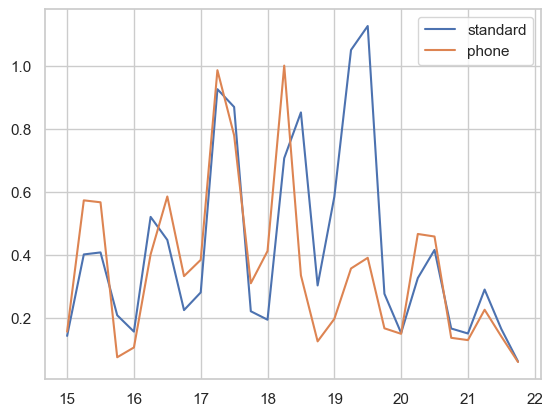

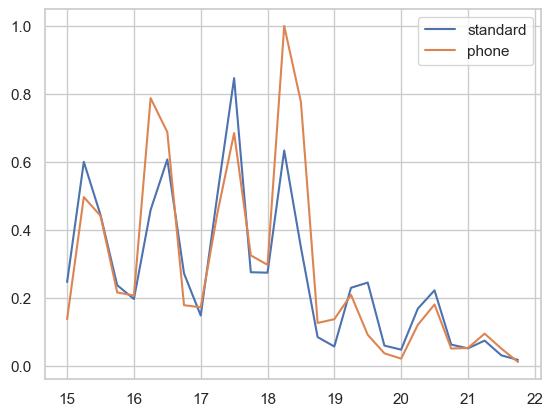

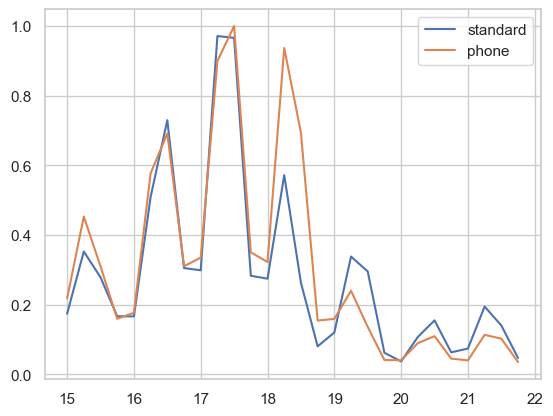

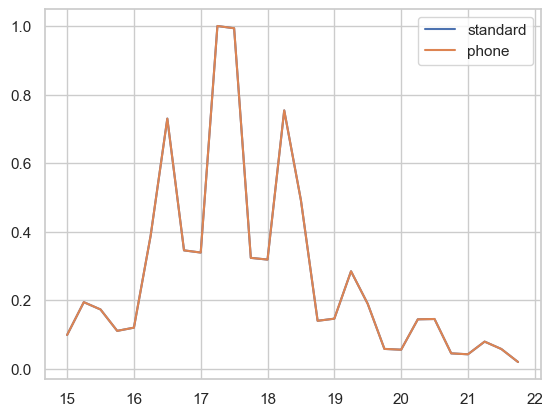

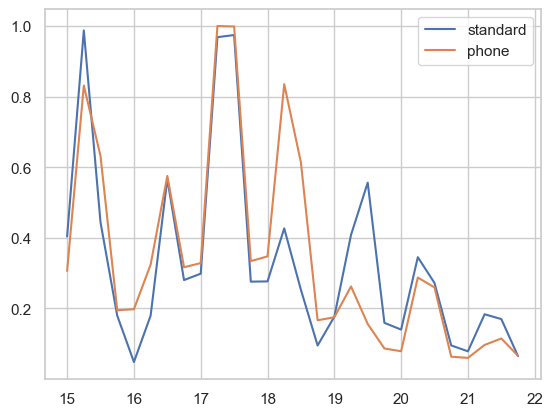

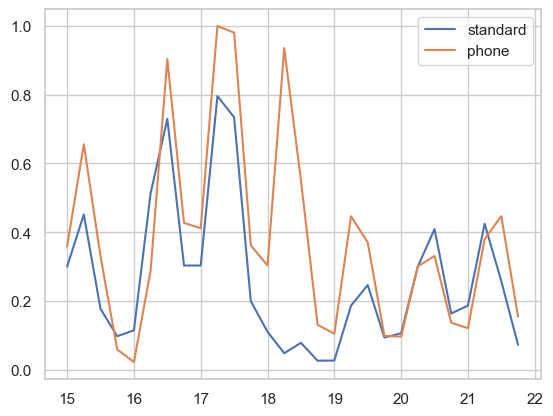

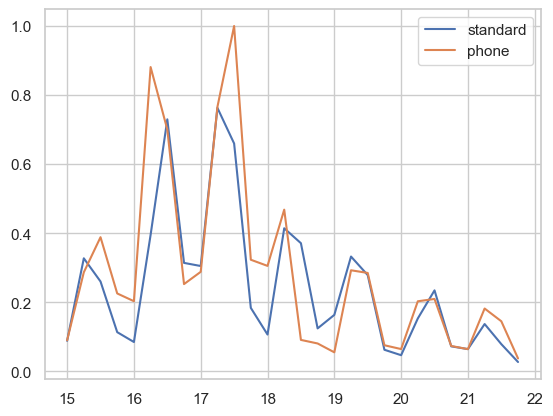

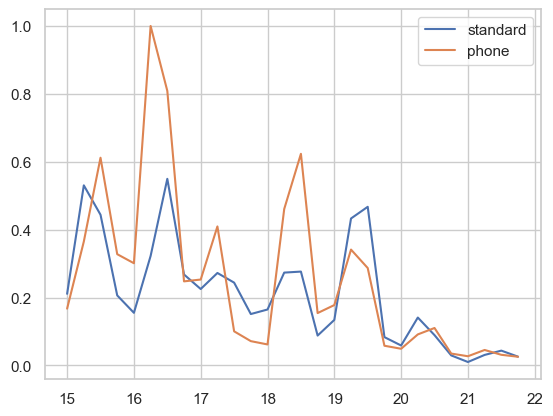

In [13]:
for i in range(9):
    sns.lineplot(x=spec_label, y=filtered_std_spec[i], label=f"standard")
    sns.lineplot(x=spec_label, y=phone_spec[i], label=f"phone")
    plt.legend()
    plt.show()